In [1]:
#load libraries
import os
import tarfile
import urllib
import pandas as pd
from pandas import set_option
import numpy as np


In [2]:
#Donload the Data

In [3]:
dataset_path = os.path.join("datasets")
def load_dataset(dataset_path = dataset_path):
    csv_path = os.path.join(dataset_path, "V4.csv")
    return pd.read_csv(csv_path)

dataset = load_dataset();


In [4]:
# Take a QUick Look at the Data Structure

In [5]:
dataset.head()


,Unnamed: 0,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0.0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0.0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,NaN,43,53798.55112,11160.355060,638467.1773,42925.70921
3,3,Jade Cunningham,malesuada@dignissim.com,USA,NaN,58,79370.03798,14426.164850,548599.0524,67422.36313
4,4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1.0,57,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
dataset.shape

(500, 10)

In [7]:
dataset.dtypes

Unnamed: 0               int64
Customer Name           object
Customer e-mail         object
Country                 object
Gender                 float64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           500 non-null    int64  
 1   Customer Name        500 non-null    object 
 2   Customer e-mail      500 non-null    object 
 3   Country              500 non-null    object 
 4   Gender               244 non-null    float64
 5   Age                  500 non-null    int64  
 6   Annual Salary        500 non-null    float64
 7   Credit Card Debt     500 non-null    float64
 8   Net Worth            500 non-null    float64
 9   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 39.2+ KB


In [9]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", "{:.2f}".format)
dataset.describe()

,Unnamed: 0,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.00,244.00,500.00,500.00,500.00,500.00,500.00
mean,249.50,0.50,46.22,62127.24,9607.65,431475.71,44209.80
std,144.48,0.50,7.99,11703.38,3489.19,173536.76,10773.18
min,0.00,0.00,20.00,20000.00,100.00,20000.00,9000.00
25%,124.75,0.00,41.00,54391.98,7397.52,299824.20,37629.90
50%,249.50,0.50,46.00,62915.50,9655.04,426750.12,43997.78
75%,374.25,1.00,52.00,70117.86,11798.87,557324.48,51254.71
max,499.00,1.00,70.00,100000.00,20000.00,1000000.00,80000.00


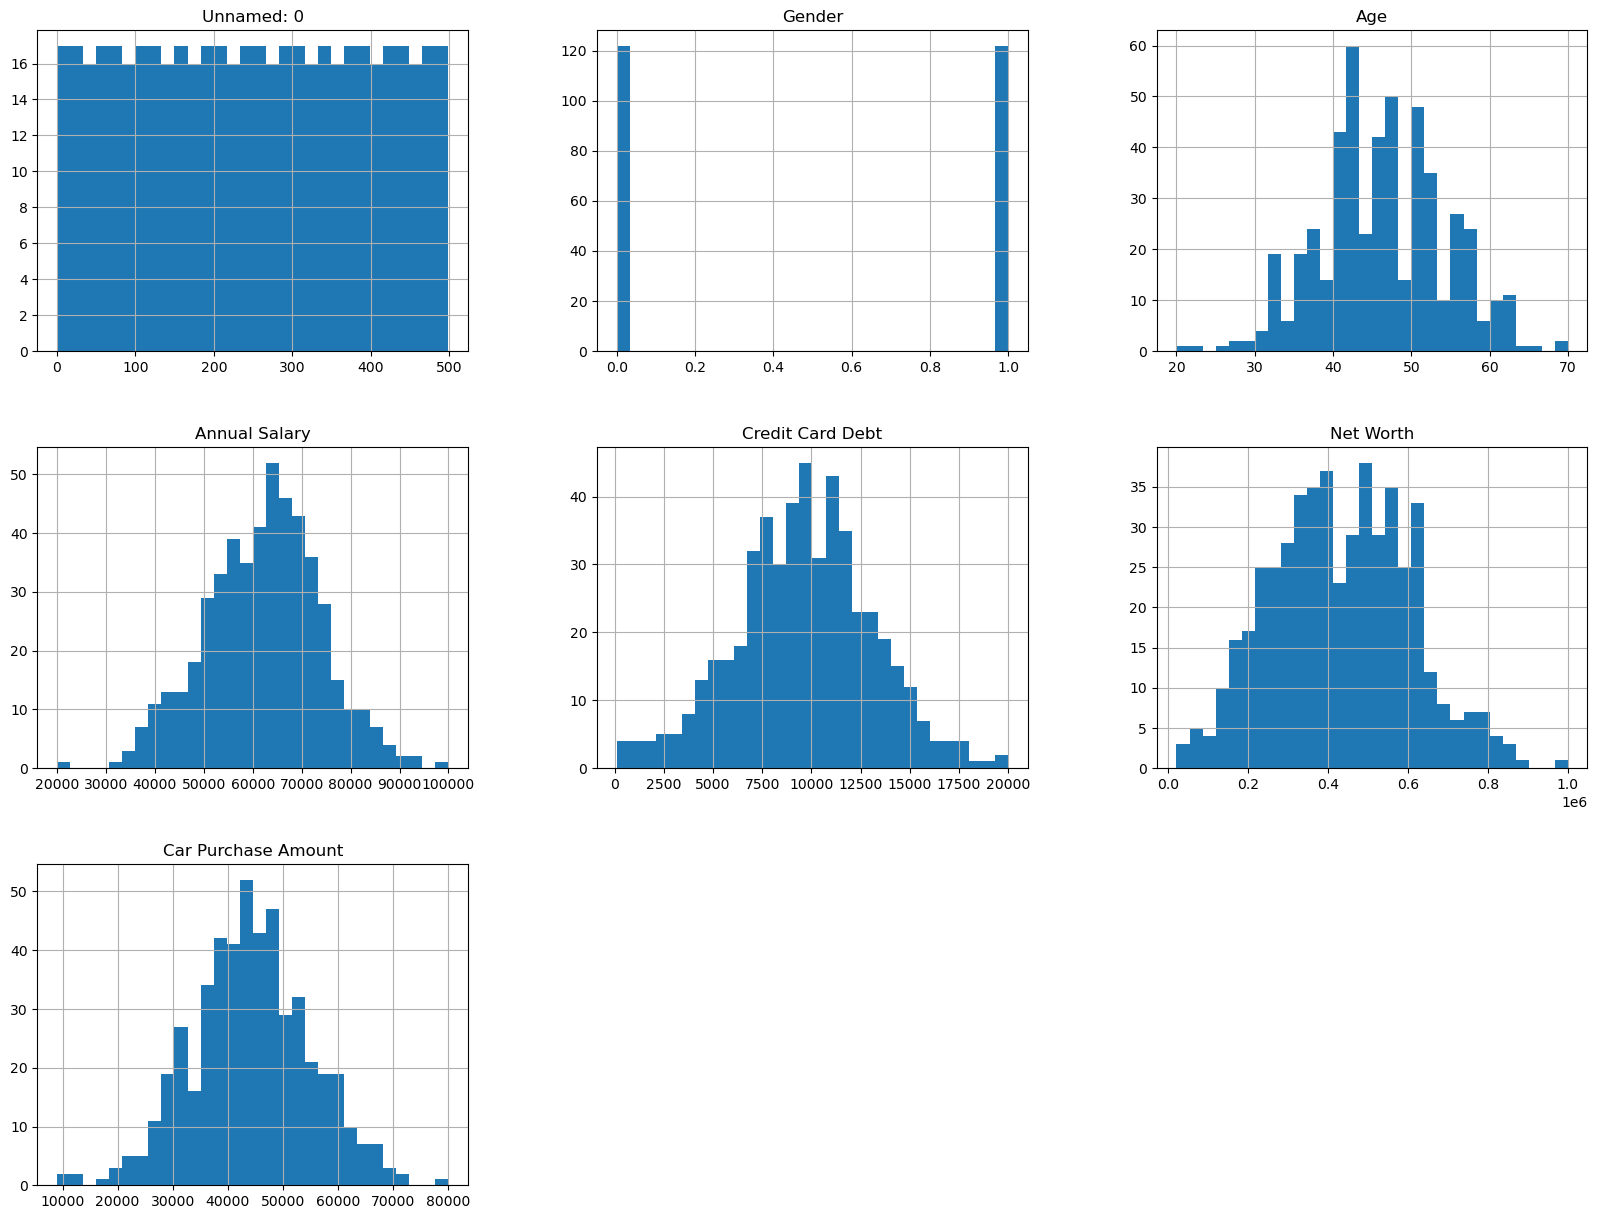

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=30, figsize = (20,15))
plt.show()

In [11]:
dataset1 = dataset_x = dataset.iloc[:,[6,9]]
dataset1


,Annual Salary,Car Purchase Amount
0,62812.09,35321.46
1,66646.89,45115.53
2,53798.55,42925.71
3,79370.04,67422.36
4,59729.15,55915.46
...,...,...
495,71942.40,48901.44
496,56039.50,31491.41
497,68888.78,64147.29
498,49811.99,45442.15


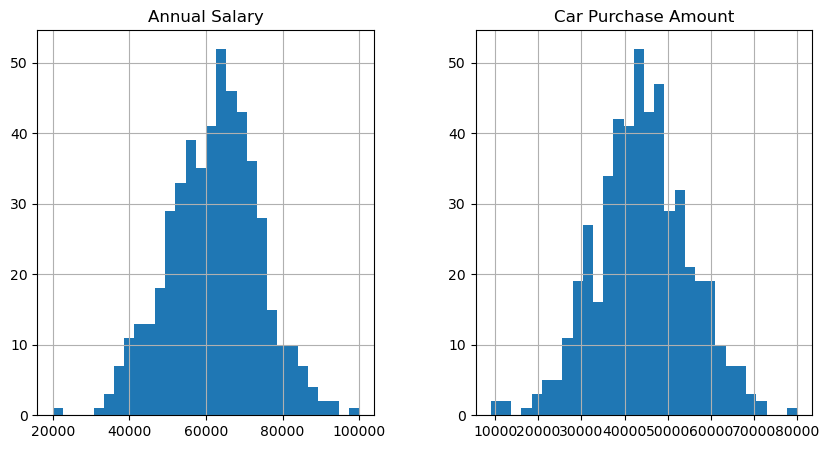

In [12]:
dataset1.hist(bins=30, figsize=(10,5))
plt.show()

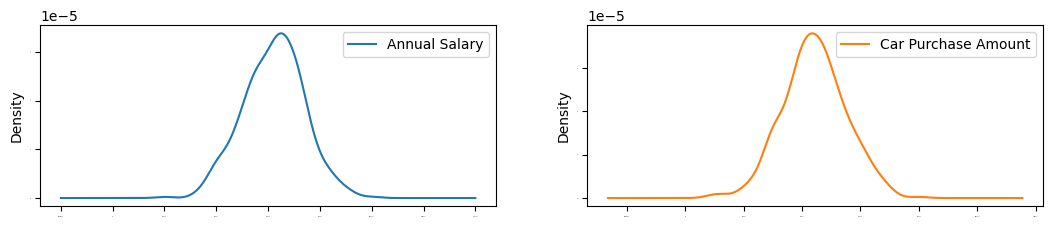

In [13]:
#Density plots
dataset1.plot(kind='density', subplots=True, layout = (3,3), sharex = False,\
legend = True, fontsize = 1, figsize = (20,8))
plt.show()

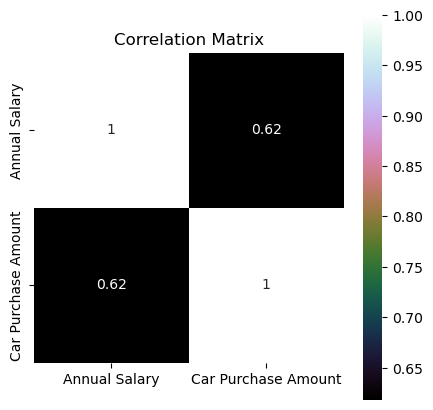

In [14]:
import seaborn as sns
correlation = dataset1.corr()
plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="cubehelix")
plt.show()

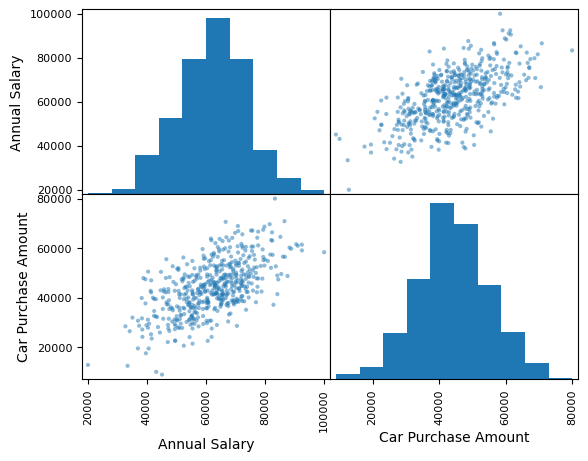

In [15]:
#Multivatiate plot: scatterplot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset1)
plt.show()

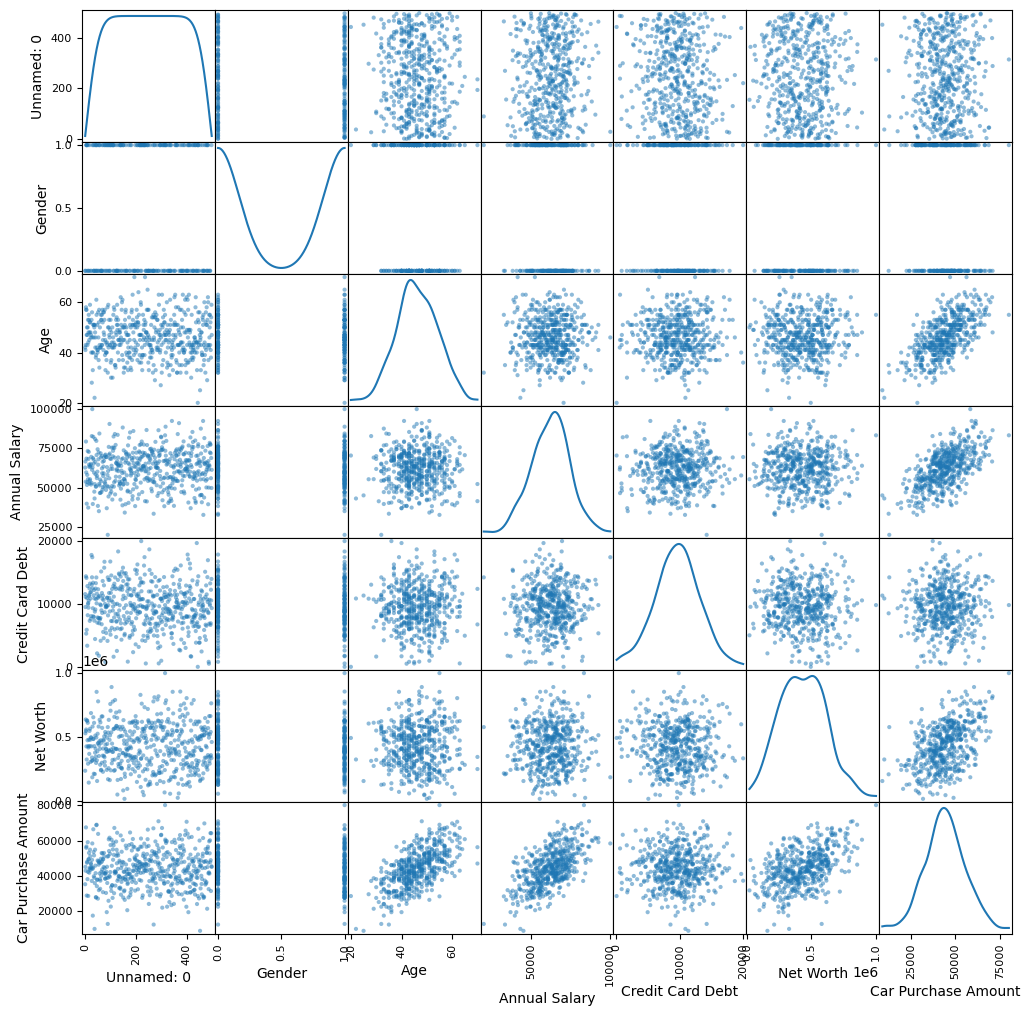

In [16]:
scatter_matrix(dataset,figsize = (12,12), diagonal="kde")
plt.show()

In [17]:
numeric_cols = ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']
corr_matrix = dataset[numeric_cols].corr()

In [18]:
corr_matrix

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Age,1.00,0.00,0.03,0.02,0.63
Annual Salary,0.00,1.00,0.05,0.01,0.62
Credit Card Debt,0.03,0.05,1.00,-0.05,0.03
Net Worth,0.02,0.01,-0.05,1.00,0.49
Car Purchase Amount,0.63,0.62,0.03,0.49,1.00


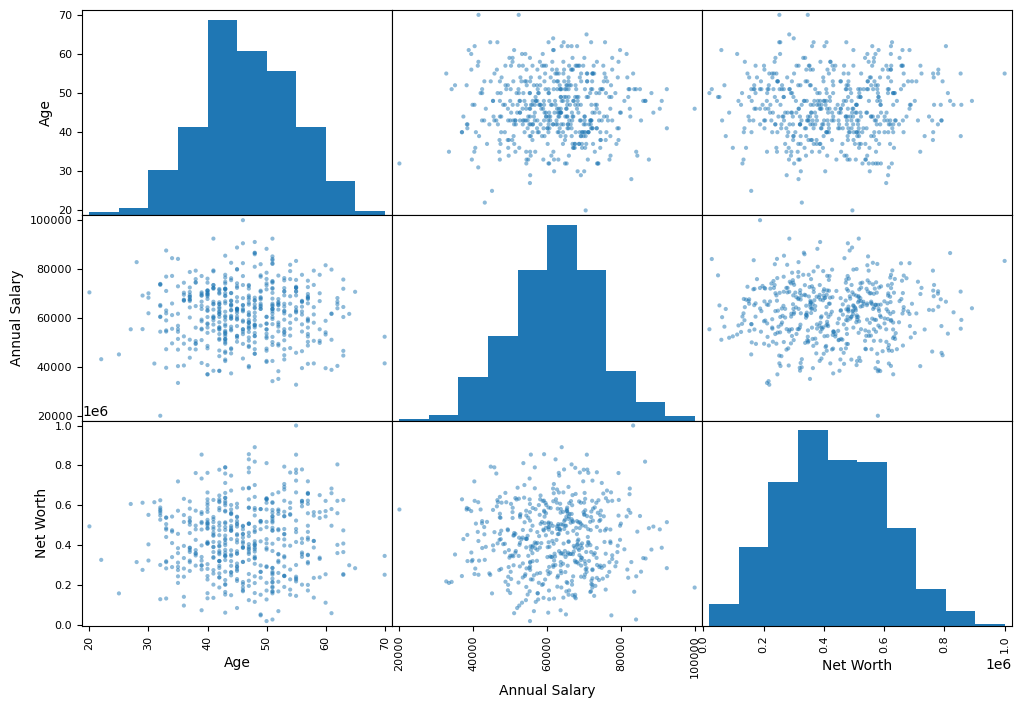

In [19]:
attributes = ["Age", "Annual Salary", "Net Worth"]
scatter_matrix(dataset[attributes],figsize=(12,8))
plt.show()

In [20]:
dataset.plot(kind = "scatter", x="Car Purchase Amount", y = "Annual Salary", alpha=0.1)
plt.axis([0,16,0,1])


(0.0, 16.0, 0.0, 1.0)

In [21]:
from sklearn.preprocessing import MinMaxScaler
gender_mode = dataset['Gender'].mode()[0]
dataset['Gender'] = dataset['Gender'].fillna(0.5)



In [22]:
from sklearn.feature_selection import SelectKBest, f_regression

dataset = dataset[numeric_cols]
dataset_x = dataset.iloc[:,:8]
dataset_y = dataset["Car Purchase Amount"]

bestfeatures = SelectKBest(f_regression, k=5)
fit = bestfeatures.fit(dataset_x, dataset_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores

,0,0
0,Age,333.43
1,Annual Salary,307.50
2,Credit Card Debt,0.42
3,Net Worth,156.15
4,Car Purchase Amount,-1121396307215254016.00


In [23]:
dataset = dataset.drop("Credit Card Debt", axis=1)
dataset.head()


,Age,Annual Salary,Net Worth,Car Purchase Amount
0,42,62812.09,238961.25,35321.46
1,41,66646.89,530973.91,45115.53
2,43,53798.55,638467.18,42925.71
3,58,79370.04,548599.05,67422.36
4,57,59729.15,560304.07,55915.46


In [24]:
dataset_X = dataset.iloc[:, :3]
dataset_Y = dataset["Car Purchase Amount"]

from sklearn.model_selection import train_test_split
test_size = 0.2
val_size = 0.25
seed = 7
dataset_X_train, dataset_X_test, dataset_Y_train, dataset_Y_test = \
train_test_split(dataset_X, dataset_Y, test_size = test_size, random_state = seed)
dataset_X_train, dataset_X_val, dataset_Y_train, dataset_Y_val = \
train_test_split(dataset_X_train, dataset_Y_train, test_size = val_size, random_state=seed)


In [25]:
#dataset_X_train = scaler.fit_transform(dataset_X_train)
#dataset_X_test = scaler.fit_transform(dataset_X_test)
#dataset_X_val = scaler.fit_transform(dataset_X_val)

from sklearn.preprocessing import MinMaxScaler

feature_names = dataset_X_train.columns

scaler = MinMaxScaler()
scaler.fit(dataset_X_train)

dataset_X_train_scaled = pd.DataFrame(
    scaler.transform(dataset_X_train),
    columns=feature_names,
    index=dataset_X_train.index
)

dataset_X_val_scaled = pd.DataFrame(
    scaler.transform(dataset_X_val),
    columns=feature_names,
    index=dataset_X_val.index
)

dataset_X_test_scaled = pd.DataFrame(
    scaler.transform(dataset_X_test),
    columns=feature_names,
    index=dataset_X_test.index
)



In [26]:
dataset_X_train_scaled

,Age,Annual Salary,Net Worth
167,0.53,0.24,0.46
380,0.82,0.55,0.15
357,0.60,0.38,0.36
224,0.49,0.48,0.61
102,0.22,0.59,0.39
...,...,...,...
116,0.51,0.61,0.31
263,0.76,0.24,0.60
298,0.16,0.37,0.60
255,0.51,0.36,0.13


In [27]:
dataset_X_val_scaled

,Age,Annual Salary,Net Worth
180,0.67,0.41,0.19
408,0.64,0.74,0.25
55,0.82,0.32,0.42
434,0.56,0.79,0.49
391,0.80,0.22,0.58
...,...,...,...
35,0.69,0.44,0.60
139,0.51,0.15,0.50
47,0.69,0.41,0.13
178,0.40,0.23,0.41


In [28]:
dataset_X_test_scaled

,Age,Annual Salary,Net Worth
308,0.38,0.77,0.30
13,0.62,0.59,0.40
414,0.38,0.45,0.25
32,0.69,0.83,0.65
460,0.44,0.12,0.49
...,...,...,...
235,0.51,0.65,0.56
26,0.18,0.84,0.30
168,0.60,0.25,0.39
451,0.80,0.56,0.61


In [29]:
dataset_Y_train

167   35438.81
380   47715.96
357   39270.58
224   45509.70
102   33640.74
        ...   
116   42408.03
263   48300.02
298   29670.83
255   29092.13
144   53655.54
Name: Car Purchase Amount, Length: 300, dtype: float64

In [30]:
dataset_Y_val

180   38763.11
408   49991.61
55    48100.29
434   55420.57
391   47970.77
        ...   
35    51612.14
139   32700.28
47    37843.47
178   29052.10
174   41104.07
Name: Car Purchase Amount, Length: 100, dtype: float64

In [31]:
dataset_Y_test

308   42497.73
13    49258.88
414   30667.61
32    66363.89
460   29556.79
        ...   
235   50702.18
26    37161.55
168   36112.79
451   59984.16
238   42997.17
Name: Car Purchase Amount, Length: 100, dtype: float64

In [32]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

lasso_cv = LassoCV(alphas=np.logspace(0, 5, 50), cv=5, random_state=seed)
lasso_cv.fit(dataset_X_train_scaled, dataset_Y_train)

LassoCV(alphas=array([1.00000000e+00, 1.26485522e+00, 1.59985872e+00, 2.02358965e+00,
       2.55954792e+00, 3.23745754e+00, 4.09491506e+00, 5.17947468e+00,
       6.55128557e+00, 8.28642773e+00, 1.04811313e+01, 1.32571137e+01,
       1.67683294e+01, 2.12095089e+01, 2.68269580e+01, 3.39322177e+01,
       4.29193426e+01, 5.42867544e+01, 6.86648845e+01, 8.68511374e+01,
       1.09854114e+02, 1.38949549e+0...
       7.19685673e+02, 9.10298178e+02, 1.15139540e+03, 1.45634848e+03,
       1.84206997e+03, 2.32995181e+03, 2.94705170e+03, 3.72759372e+03,
       4.71486636e+03, 5.96362332e+03, 7.54312006e+03, 9.54095476e+03,
       1.20679264e+04, 1.52641797e+04, 1.93069773e+04, 2.44205309e+04,
       3.08884360e+04, 3.90693994e+04, 4.94171336e+04, 6.25055193e+04,
       7.90604321e+04, 1.00000000e+05]),
        cv=5, random_state=7)

In [33]:
print(f"Лучший alpha: {lasso_cv.alpha_:.4f}")

Лучший alpha: 1.0000


In [34]:
best_lasso = Lasso(alpha=lasso_cv.alpha_)
best_lasso.fit(dataset_X_train_scaled, dataset_Y_train)

Lasso()

In [35]:
#оценка на валидации
val_pred = best_lasso.predict(dataset_X_val_scaled)
val_rmse = np.sqrt(mean_squared_error(dataset_Y_val, val_pred))
val_r2 = r2_score(dataset_Y_val, val_pred)

print(f"\nValidation RMSE: {val_rmse:.2f}")
print(f"Validation R2: {val_r2:.4f}")


Validation RMSE: 251.31
Validation R2: 0.9995


In [36]:
#Оценка на тесте
test_pred = best_lasso.predict(dataset_X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(dataset_Y_test, test_pred))
test_r2 = r2_score(dataset_Y_test, test_pred)

print(f"\nTest RMSE: {test_rmse:.2f}")
print(f"Test R2: {test_r2:.4f}")


Test RMSE: 249.79
Test R2: 0.9995


In [41]:
coef_df = pd.DataFrame({
    'Feature': dataset_X.columns,
    'Coefficient': best_lasso.coef_,
})

display(best_lasso.coef_)
display(dataset_X)

print("\nВажность признаков:")
print(coef_df)


array([37841.03547517, 33200.26763216, 28066.28254002])

,Age,Annual Salary,Net Worth
0,42,62812.09,238961.25
1,41,66646.89,530973.91
2,43,53798.55,638467.18
3,58,79370.04,548599.05
4,57,59729.15,560304.07
...,...,...,...
495,41,71942.40,541670.10
496,38,56039.50,360419.10
497,54,68888.78,764531.32
498,59,49811.99,337826.64



Важность признаков:
         Feature  Coefficient
0            Age     37841.04
1  Annual Salary     33200.27
2      Net Worth     28066.28


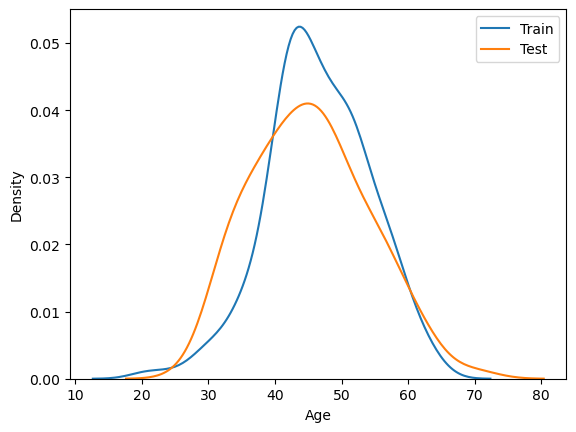

In [39]:
import seaborn as sns
sns.kdeplot(dataset_X_train["Age"], label='Train')
sns.kdeplot(dataset_X_test["Age"], label='Test')
plt.legend()
plt.show()